
Predicted class for the random point [14.919    0.62294]: 0.0


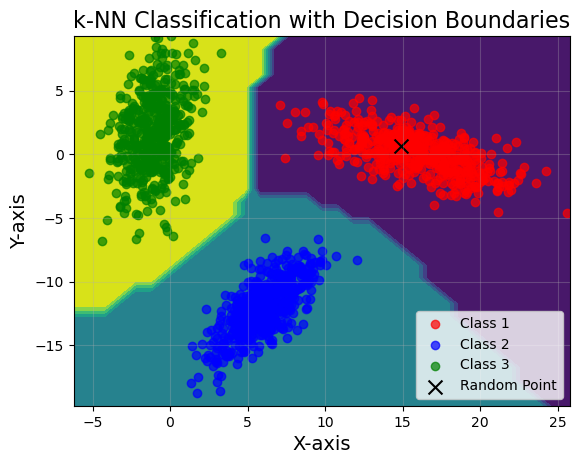

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load datasets with space delimiter
class1 = pd.read_csv('desktop/internship/dataset/LS_Data/class1.txt', delimiter=' ', header=None)
class1.columns = ['X', 'Y']
class2 = pd.read_csv('desktop/internship/dataset/LS_Data/class2.txt', delimiter=' ', header=None)
class2.columns = ['X', 'Y']
class3 = pd.read_csv('desktop/internship/dataset/LS_Data/class3.txt', delimiter=' ', header=None)
class3.columns = ['X', 'Y']

# Combine the datasets
combined_dataset = pd.concat([class1, class2, class3], ignore_index=True)

# Features and labels
X = combined_dataset[['X', 'Y']]  # Features (X and Y)
y = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])  # Labels: Class 1, 2, 3

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate Euclidean distances between a random point and dataset
def euclidean_distances(X_train, random_point):
    distances = []  # To store calculated distances
    for _, row in X_train.iterrows():
        row_point = row.values  # Convert row to NumPy array
        distance = np.sqrt(np.sum((row_point - random_point) ** 2))  # Euclidean formula
        distances.append(distance)  # Append result to distances
    return np.array(distances)

# Calculate distances array
random_point = X.sample(n=1).values.flatten()  # Select a random point from X
distance_array = euclidean_distances(X[['X', 'Y']], random_point)

# k-NN function to predict the class of the random point
class KNN:
    def __init__(self, k=11):
        self.k = k  # Number of neighbors
    
    # Fit the model
    def fit(self, X_train, y_train):
        self.X_train = X_train  # Store training data
        self.y_train = y_train  # Store training labels
        
    # Predict the class of a given data point
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return predictions
    
    # Predict the class for a single data point
    def _predict(self, x):
        distances = euclidean_distances(self.X_train, x)  # Calculate distances
        k_indices = np.argsort(distances)[:self.k]  # Get indices of k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]  # Get labels of nearest neighbors
        most_common = Counter(k_nearest_labels).most_common(1)  # Get the most common label
        return most_common[0][0]

# Initialize and train k-NN classifier
knn = KNN(k=11)
knn.fit(X_train, y_train)

# Predict the class for the random point
predicted_class = knn.predict([random_point])  
print(f"\nPredicted class for the random point {random_point}: {predicted_class[0]}")

x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point in the grid
grid_predictions = knn.predict(grid_points)
grid_predictions = np.array(grid_predictions).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, grid_predictions, alpha=1)
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)
plt.scatter(random_point[0], random_point[1], color='black', marker='x', label='Random Point', s=100)
plt.title("k-NN Classification with Decision Boundaries", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Confusion Matrix:
148 0 0
0 141 0
0 0 161


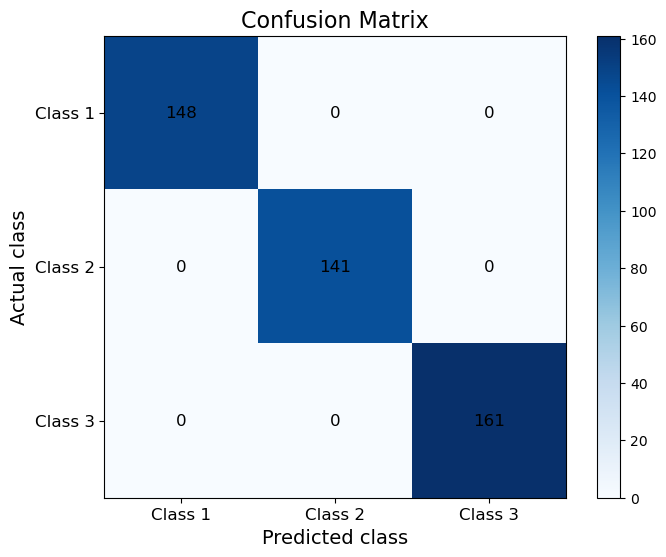

Class 1: Precision = 1.00, Recall = 1.00, F-Score = 1.00
Class 2: Precision = 1.00, Recall = 1.00, F-Score = 1.00
Class 3: Precision = 1.00, Recall = 1.00, F-Score = 1.00


In [2]:
y_pred = knn.predict(X_test.values)  # Ensure X_test is passed as a NumPy array if necessary

# Unique classes (assumes 3 classes: 0, 1, and 2)
classes = np.unique(y_test)

# Initialize the confusion matrix
confusion_matrix = np.zeros((len(classes), len(classes)), dtype=int)

# Populate the confusion matrix
for true, pred in zip(y_test, y_pred):
    confusion_matrix[int(true), int(pred)] += 1

# Print the confusion matrix
print("Confusion Matrix:")
for row in confusion_matrix:
    print(" ".join(map(str, row)))

# Visualization of the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix", fontsize=16)

# Add labels for axes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, [f"Class {int(c)+1}" for c in classes], fontsize=12)
plt.yticks(tick_marks, [f"Class {int(c)+1}" for c in classes], fontsize=12)
plt.xlabel("Predicted class", fontsize=14)
plt.ylabel("Actual class", fontsize=14)

# Annotate each cell with the count
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, confusion_matrix[i, j], 
                 ha="center", va="center", color="black", fontsize=12)

# Show the plot
plt.show()
 # Function to calculate precision, recall, and F1-score
def calculate_metrics(confusion_matrix):
    num_classes = len(confusion_matrix)
    precision = []
    recall = []
    f1_score = []
    
    for i in range(num_classes):
        # True Positives (TP)
        tp = confusion_matrix[i, i]
        
        # False Positives (FP)
        fp = sum(confusion_matrix[:, i]) - tp
        
        # False Negatives (FN)
        fn = sum(confusion_matrix[i, :]) - tp
        
        # Precision: TP / (TP + FP)
        if tp + fp > 0:
            precision_i = tp / (tp + fp)
        else:
            precision_i = 0.0
        precision.append(precision_i)
        
        # Recall: TP / (TP + FN)
        if tp + fn > 0:
            recall_i = tp / (tp + fn)
        else:
            recall_i = 0.0
        recall.append(recall_i)
        
        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        if precision_i + recall_i > 0:
            f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
        else:
            f1_i = 0.0
        f1_score.append(f1_i)
    
    return precision, recall, f1_score

# Compute precision, recall, and F1-score for each class
precision, recall, f1_score = calculate_metrics(confusion_matrix)

# Print the results
for i in range(3):
    print(f"Class {i+1}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F-Score = {f1_score[i]:.2f}")
